In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats


Read Data

In [2]:
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Outliers

In [4]:
z = np.abs(stats.zscore(data['price']))
print(z)

[0.86671733 0.00568792 0.98084935 ... 0.37586519 0.38158814 0.58588173]


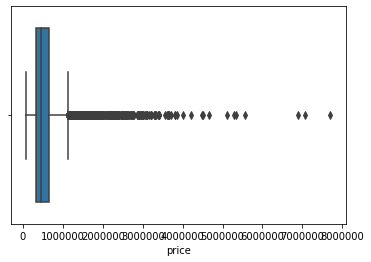

In [5]:
sns.boxplot(x=data['price'])

In [6]:
#sns.boxplot(y=data['Y'])
df = pd.DataFrame(data=data)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
#f_data = data[(z < 100).all(axis=0)]
#f_data.head
x = df
df.drop(['date'],axis=1)
for i in df:
    if i != 'date':
        q = df[i].quantile(0.99)
        df[df[i] < q]
        q_low = df[i].quantile(0.01)
        q_hi  = df[i].quantile(0.99)

        df_filtered = df[(df[i] < q_hi) & (df[i] > q_low)]
        
df_filtered.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
print(len(df))
print(len(df_filtered))
if(len(df) == len(df_filtered)):
    print('No outliners')
data = df_filtered

21613
21178


 Normalisation

In [9]:
data_n = data.copy()
for i in data:
    if i!='date':
        data_n[i] = data[i].copy()
        data_n[i] = (data_n[i] - data_n[i].min())/(data_n[i].max() - data_n[i].min())
data_n.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.720103,20141013T000000,0.019266,0.090909,0.12500,0.075680,0.004338,0.0,0.0,0.0,...,0.500000,0.103851,0.000000,0.478261,0.000000,0.893939,0.571498,0.215000,0.153043,0.028583
1,0.647853,20141209T000000,0.060721,0.090909,0.28125,0.193878,0.005705,0.4,0.0,0.0,...,0.500000,0.219370,0.082988,0.443478,0.988089,0.626263,0.908959,0.163333,0.213913,0.041339
2,0.568795,20150225T000000,0.013770,0.060606,0.12500,0.040816,0.008074,0.0,0.0,0.0,...,0.416667,0.056009,0.000000,0.286957,0.000000,0.136364,0.936143,0.235000,0.393043,0.044052
3,0.251157,20141209T000000,0.069377,0.121212,0.37500,0.142007,0.003779,0.0,0.0,0.0,...,0.500000,0.088681,0.188797,0.565217,0.000000,0.681818,0.586939,0.101667,0.156522,0.024415
4,0.197333,20150218T000000,0.057049,0.090909,0.25000,0.118197,0.006425,0.0,0.0,0.0,...,0.583333,0.162194,0.000000,0.756522,0.000000,0.368687,0.741354,0.391667,0.233043,0.040467


Split Data

In [10]:
train_data,test_data = train_test_split(data_n,test_size=0.1)

In [11]:
print(len(train_data))
train_data.head()

19060


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2269,0.166077,20150225T000000,0.020984,0.090909,0.18750,0.085884,0.006013,0.0,0.0,0.0,...,0.500000,0.117853,0.000000,0.547826,0.0,0.106061,0.084285,0.425000,0.193043,0.041089
10937,0.742360,20140722T000000,0.025836,0.121212,0.28125,0.155187,0.004839,0.4,0.0,0.0,...,0.500000,0.212952,0.000000,0.852174,0.0,0.005051,0.207656,0.261667,0.344348,0.033175
20647,0.390837,20141219T000000,0.060977,0.090909,0.28125,0.117347,0.000856,0.8,0.0,0.0,...,0.583333,0.161027,0.000000,0.991304,0.0,0.681818,0.618144,0.106667,0.205217,0.000750
13161,0.515244,20141112T000000,0.093770,0.121212,0.31250,0.193027,0.010445,0.0,0.0,0.0,...,0.500000,0.171529,0.165975,0.426087,0.0,0.575758,0.866656,0.176667,0.226087,0.033291
14484,0.355800,20141107T000000,0.028197,0.090909,0.21875,0.089286,0.054112,0.0,0.0,0.0,...,0.500000,0.122520,0.000000,0.547826,0.0,0.186869,0.453595,0.420000,0.259130,0.551061


In [12]:
xa = np.array(train_data['sqft_living'])
ya = np.array(train_data['price'])


Train Data

In [13]:
from sympy import Symbol, Derivative, symbols
m= Symbol('m')
c= Symbol('c')
function = '0.5*(y-m*x-c)**2'
partialderiv= Derivative(function, m)
dfm = partialderiv.doit()
partialderiv= Derivative(function, c)
dfc = partialderiv.doit()

print(f'first order derivatives of given function are de/dm = {dfm} ,de/dc = {dfc}')
err = []
#step 1 initialise values
bs = 2
m1 = 1.0 
c1 = -1.0  #variable x, y
itr = 25  #epoches
learning_rate = 0.1  #learning rate

ns = len(xa)
nb = ns//bs
ms = ns%bs


for i in range(0,itr):
    for k in range(0,nb):
        er = 0
        dfmv1 = 0
        dfcv1 = 0
        for j in range(0,bs):
            er +=  ((ya[j] - (m1 * xa[j]) - c1))**2
            index = k*bs + j
            #step 2 substitute x ,y in first order derivatives df/dx, df/dy
            m = symbols('m')
            c = symbols('c')
            x = symbols('x')
            y = symbols('y')
            dfmv = dfm.subs(m, m1) 
            dfmv = dfmv.subs(c, c1) 
            dfmv = dfmv.subs(x, xa[index]) 
            dfmv = dfmv.subs(y, ya[index]) 
            dfmv = round(dfmv,2)
            dfcv = dfc.subs(c, c1) 
            dfcv = dfcv.subs(m, m1) 
            dfcv = dfcv.subs(x, xa[index]) 
            dfcv = dfcv.subs(y, ya[index]) 
            dfcv = round(dfcv,2)
            dfmv1 += dfmv
            dfcv1 += dfcv
            
        dfmv1 = dfmv1/bs
        dfcv1 = dfcv1/bs

        dfmv1 = round(dfmv1,2)
        dfcv1 = round(dfcv1,2)
        #step3 find change in x , y
        dm = (-1.0)*learning_rate*dfmv1
        dc = (-1.0)*learning_rate*dfcv1
        #step4 update variable 
        m1 = m1 + dm 
        c1 = c1 + dc
        
        er = (1/(2*len(train_data['sqft_living'])))*(er)
        err.append(er)
        #step5 increment iterations 
        #step6 break loop if iterations exceed no of epoches
k = nb
if(ms>0):
    er = 0
    dfmv1 = 0
    dfcv1 = 0
    for j in range(0,ms):
        
        er +=  ((ya[j] - (m1 * xa[j]) - c1))**2
        index = k*bs + j
        #step 2 substitute x ,y in first order derivatives df/dx, df/dy
        m = symbols('m')
        c = symbols('c')
        x = symbols('x')
        y = symbols('y')
        dfmv = dfm.subs(m, m1) 
        dfmv = dfmv.subs(c, c1) 
        dfmv = dfmv.subs(x, xa[index]) 
        dfmv = dfmv.subs(y, ya[index]) 
        dfcv = dfc.subs(c, c1) 
        dfcv = dfcv.subs(m, m1) 
        dfcv = dfcv.subs(x, xa[index]) 
        dfcv = dfcv.subs(y, ya[index]) 
        dfmv1 += dfmv
        dfcv1 += dfcv

    dfmv1 = dfmv1/ms
    dfcv1 = dfcv1/ms

    #step3 find change in x , y
    dm = (-1.0)*learning_rate*dfmv1
    dc = (-1.0)*learning_rate*dfcv1
    #step4 update variable 
    m1 = m1 + dm 
    c1 = c1 + dc
    
    er = (1/(2*len(train_data['sqft_living'])))*(er)
    err.append(er)
#step7 print variable x1, y1
m1= round(m1,2)
c1= round(c1,2)
print(m1, c1)
print(f'minimum value obtained at m = {m1} ,c ={c1} for given function')

first order derivatives of given function are de/dm = -1.0*x*(-c - m*x + y) ,de/dc = 1.0*c + 1.0*m*x - 1.0*y
0.30 0.02
minimum value obtained at m = 0.30 ,c =0.02 for given function


RMSE for Training data

In [17]:

train_data_pred = [i for i in xa]
for k in range(len(xa)):
    train_data_pred[k]=(m1*xa[k] + c1)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ya,train_data_pred)
mse


0.001288526208237635

Text(0.5, 1.0, 'predicted data vs actual data')

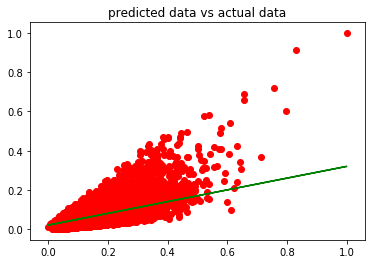

In [19]:
plt.plot(np.array(train_data['sqft_living']),np.array(train_data_pred),'green')
plt.scatter(np.array(train_data['sqft_living']),np.array(train_data['price']),color='red')
plt.title('predicted data vs actual data')

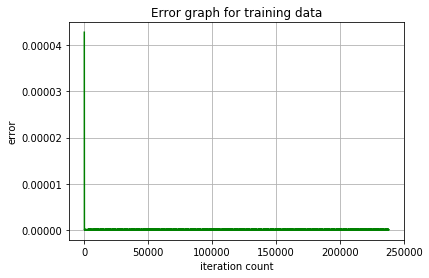

In [21]:
iters = np.arange(itr*nb)
plt.plot(iters,err,'green')
plt.title("Error graph for training data")
plt.xlabel("iteration count")
plt.ylabel("error")
plt.grid()

Test Data

In [22]:
xa = np.array(test_data['sqft_living'])
ya = np.array(test_data['price'])

test_data_pred = [i for i in xa]
for k in range(len(xa)):
    test_data_pred[k]=(m1*xa[k] + c1)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ya,test_data_pred)
mse


0.0016236102128651553

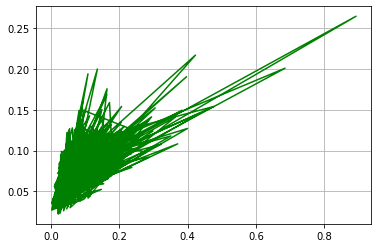

In [23]:
#plt.scatter(test_data['X'],test_data['Y'],color='red')
plt.plot(test_data['price'],test_data_pred,'green')
plt.grid()

In [26]:
x_min = data['sqft_living'].min()
x_max = data['sqft_living'].max()
y_min = data['price'].min()
y_max = data['price'].max()

Predict Output

In [27]:
x1 = float(input("enter sqrt feet values sqft_living , sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15 value :"))

x1 = (x1 - x_min)/(x_max - x_min)
y = m1*x1+c1
y = y*(y_max - y_min) + y_min
print(f"price  is : {y}")

enter sqrt feet values sqft_living , sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15 value :2560
price  is : 668911.203397375
